# PSEUDOCODE
based off the MATLAB pseudocode given in Appendix I written by previous head TA Raymond.

*you should update numpy when you can*
- when you do this trapz turns into trapeziod I think

## 0: Initialize Parameters, 1: SFD, BMD Under Train Loading
SFDi and BMDi to be plotted, maxS and maxB for your own knowledge and use in future steps.

In [117]:
import matplotlib.pyplot as plt
import math

L = 1200 # Length of bridge
n = 1200 + 2*52 # Discretize into 1 mm seg.
#P = 400 # Total weight of train [N]
x = [] # x-axis
xi = 0
for i in range(0, n+1):
    x.append(xi)
    xi += L/(n)

x_train = [52, 228, 392, 568, 732, 908] # train load locations
#P_train = [P/6] * 6 # load at each location
#P_train = [135/2, 135/2, 135/2, 135/2, 182/2, 182/2] # load at each location
P = 265 
P_train = [P*1.1/2, P*1.1/2, P/2, P/2, P*1.35/2, P*1.35/2] # load at each location

print("total load", sum(P_train))

n_train = 12 # number of train locations

# train start locations
t_loc = [-52]
for i in range (1, n_train):
    t_loc.append(t_loc[0] + (344/(n_train-1) * (i))) # CHECK THIS
print("train start locations", t_loc)

SFDi = [] # 1 SFD for each train loc
BMDi = [] # 1 BMD for each train loc
bm_loc = []
for i in range(n_train): # avoid aliasing
    SFDi.append([0]*len(x))
    bm_loc.append([0])
    #BMDi.append([0]*len(x))
maxS = [0]*n_train # maximum shear force for each loc
maxB = [0]*n_train # maximum bending moment for each loc


# How to decide which locations to use?
for i in range(0, len(t_loc)):

    # REACTION FORCES
    
    # sum of moments at A
    Fb = 0
    sf_loc = [] # shear force locations
    for xp in range(len(x_train)):
        Fb += P_train[xp] * (t_loc[i] + x_train[xp])
        sf_loc.append(t_loc[i] + x_train[xp])
    Fb /= 1200 # dist between supports always 1200mm
    # sum of forces in y
    Fa = sum(P_train) - Fb

    # Bending Moment list
    bm_loc[i] = [0]
    bm_loc[i].extend(sf_loc)
    bm_loc[i].append(1200)
    #print()
    #print("bending moment locations:", bm_loc[i])
    BMDi.append([0]*len(bm_loc[i])) # + 2 for reaction forces 
    #print(BMDi[i])

    '''
    print("Fa", Fa, "Fb", Fb)
    print("shear force locations", sf_loc)
    print("shear forces", P_train)
    '''

    # no uniform load so no applied loads thing for now

    # SHEAR FORCE DATA
    
    # Add to SFD

    #print("initial SFDi[i][0]", i, SFDi[i][0])
    for j in range(0, len(SFDi[i])):
        SFDi[i][j] += Fa
    #print(SFDi[i][0])
    for xs in range(0, len(sf_loc)):
        #print(sf_loc[xs], SFDi[i][int(sf_loc[xs])] - P_train[xs])
        for j in range(int(sf_loc[xs]), len(SFDi[i])):
            SFDi[i][j] -= P_train[xs]
    #SFDi[i][-1] += Fb
    #SFDi[i][0] = Fa
    SFDi[i][-1] = 0
    #print(SFDi[i][-1])

    '''
    print()
    print("SF at 1st load:", SFDi[i][sf_loc[0]])
    print("SF just past 1st load:", SFDi[i][sf_loc[0]+1])
    for k in range(1, len(sf_loc)):
        print("SF just before load", str(k+1) + ":", SFDi[i][sf_loc[k]-1])
        print("SF at load", str(k+1) + ":", SFDi[i][sf_loc[k]])
    '''

    
    # BENDING MOMENT DATA
    '''
    -------------------------------------------
    Manually integrate by taking area under rectangles
    because there is too much error with trapz (we should
    *not* be getting negative moment).
    -------------------------------------------
    '''

    '''
    print()
    print("SF at Fa:", SFDi[i][bm_loc[i][0]])
    print("SF just past Fa:", SFDi[i][bm_loc[i][0]+1])
    for k in range(1, len(bm_loc[i])-1):
        print("SF just before load", str(k) + ":", SFDi[i][int(bm_loc[i][k])-1])
        print("SF at load", str(k) + ":", SFDi[i][int(bm_loc[i][k])])
    print("SF just before Fb:", SFDi[i][-2])
    print("SF at Fb:", SFDi[i][-1])
    '''
    
    BMDi[i][0] = 0
    for j in range(1, len(bm_loc[i])):
        #print(j, bm_loc[i][j], SFDi[i][round(bm_loc[i][j])-1])
        #print("rect base:", round(bm_loc[i][j])-round(bm_loc[i][j-1]))
        BMDi[i][j] = BMDi[i][j-1] + (int(bm_loc[i][j])-int(bm_loc[i][j-1])) * (SFDi[i][int(bm_loc[i][j])-1])
    BMDi[i][-1] = 0

    '''
    print("BM data")
    for xs in range(len(bm_loc[i])):
        print(bm_loc[i][xs], BMDi[i][xs])
    '''

    
for i in range(0, n_train):
    s1 = max(SFDi[i])
    s2 = -min(SFDi[i]) # bc shear force can be negative
    maxS[i] = max([s1, s2])
    if i == 0 or i == (n_train-1):
        maxS[i] = max([maxS[i], Fa, Fb])
    maxB[i] = max(BMDi[i])

#print()
#print(SFDi[i])
#print(BMDi[i])
print()
print("Maximum shear at every location:", maxS)
print("Maximum moment at every location:", maxB)
print()
print(max(maxS), max(maxB))

print(len(x)) # because I originally accidentally used x somewhere else

total load 914.25
train start locations [-52, -20.727272727272727, 10.545454545454547, 41.81818181818181, 73.0909090909091, 104.36363636363637, 135.63636363636363, 166.9090909090909, 198.1818181818182, 229.45454545454544, 260.72727272727275, 292.0]

Maximum shear at every location: [606.9383333333334, 545.5707575757576, 521.7448484848485, 497.9189393939394, 474.0930303030303, 463.9828787878788, 487.8087878787878, 511.63469696969696, 535.4606060606061, 559.2865151515152, 583.1124242424244, 606.9383333333334]
Maximum moment at every location: [147841.73333333334, 150345.2043939394, 153486.5224242424, 155150.6340909091, 155811.6324242424, 154497.50545454546, 151706.17212121218, 151201.33909090908, 150027.7424242424, 146974.32409090904, 142443.6993939393, 136743.17999999996]

606.9383333333334 155811.6324242424
1305


I will test out plotting this stuff before moving on.

1305
1305
8

-52 606.9383333333334
73.0909090909091 155811.6324242424


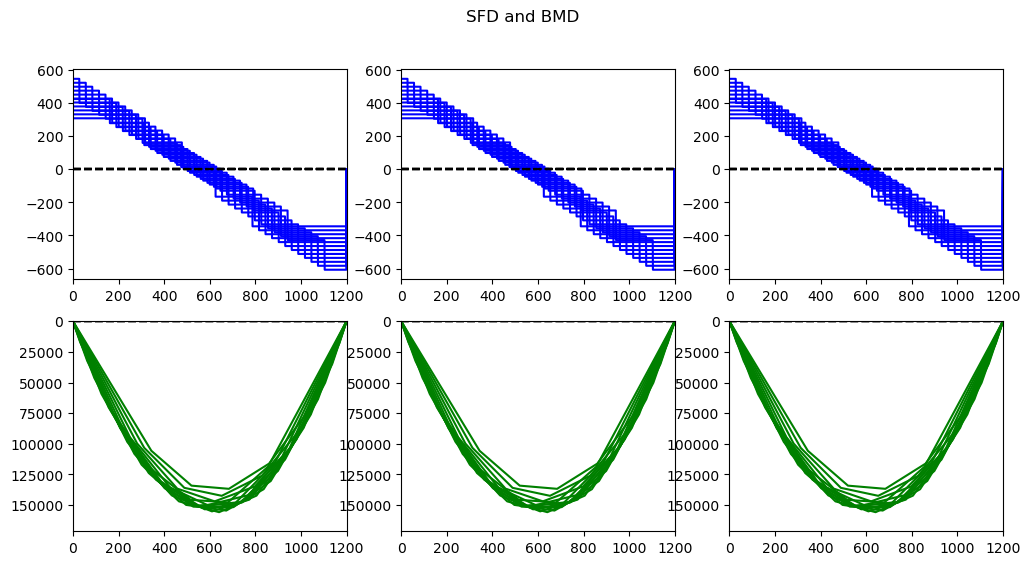

In [118]:
# plot with subplots
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 6))

# check dimensions
print(len(x))
print(len(SFDi[0]))
print(len(BMDi[0]))

# add data to each axis, set axis limits
for col in range(n_train):
    for e in [0, 1, 2]:
        # add data to each axis
        axs[0, e].plot(x, SFDi[col], 'b')
        axs[1, e].plot(bm_loc[col], BMDi[col], 'g')

        # set axis limits
        axs[0, e].set_xlim([0, 1200])
        axs[1, e].set_xlim([0, 1200])
        axs[1, e].set_ylim([max(maxB)*1.1, 0])

        # dotted lines on y=0
        axs[0, e].axhline(y = 0, color = 'black', linestyle = '--')
        axs[1, e].axhline(y = 0, color = 'black', linestyle = '--')
        
fig.suptitle('SFD and BMD')
fig.savefig("tests_sfbm_capabilities")
print()
print(t_loc[maxS.index(max(maxS))], max(maxS)) 
print(t_loc[maxB.index(max(maxB))], max(maxB))

Vizualize Shear Force and Bending Moment Envelopes

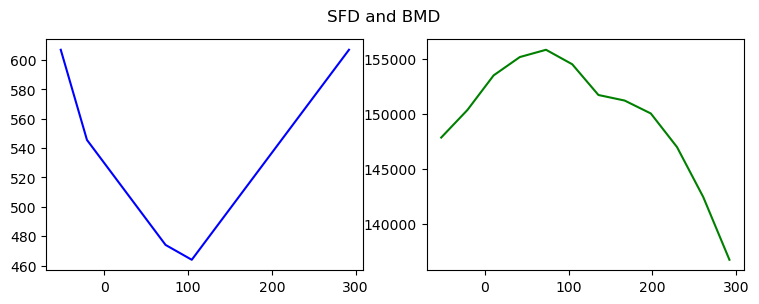

In [119]:
# plot with subplots
fig2, axs2 = plt.subplots(ncols = 2, nrows = 1, figsize=(9, 3))

axs2[0].plot(t_loc, maxS, 'b')
axs2[1].plot(t_loc, maxB, 'g')

fig2.suptitle('SFD and BMD')
fig2.savefig("tests_sfbm_envelopes")

## 2: Define Bridge Parameters, 3: Calculate Sectional Properties
Because I don't want to do user input (at least for now), be prepared to edit this part in the future.
These parameters shamelessly taken from the other code I created to calculate I.

You can also try putting these into an optimize function to optimize, alternatively, use your brain and optimize yourself.

In [120]:
# Bridge Parameters pt.1 - Design 0
# any thickness can only be multiples of 1.27

tfh = 1.27*3 # top flange height
tfw = 100 # top flange width
bfh = 1.27 # bottom flange height
bfw = 80 # bottom flange width
wh = 75-1.27-1.27 # web height
ww = 1.27 # web width
gth = 1.27 # glue tab height
gtw = 5+1.27 # glue tab width
gtg = 5 # area of glue tab with glue

t_height = bfh + wh + gth + tfh
print("Height from Supports to Deck:", t_height, "mm")
print()

# Centroid - Design 0 
A1 = tfh*tfw # top flange
y1 = bfh + wh + gth + (tfh/2)
A2 = gth * gtw # glue tabs
y2 = bfh + wh + (gth/2)
A3 = wh * ww # webs
y3 = bfh + (wh/2)
A4 = bfh * bfw # bottom flange
y4 = bfh/2
num = A1*y1 + 2*A2*y2 + 2*A3*y3 + A4*y4
denom = A1 + 2*A2 + 2*A3 + A4
cy = num/denom
print("Centroid (\u0233):", cy, "mm")

'''
minim --> "lowest" point of the cross-section,
          value is relative to the centroid.
maxim --> "highest" point of the cross-section,
          value is relative to the centroid.
b --> list of different widths in order from
      top to bottom.
bn --> list of values relative to the centroid
       where width changes
n --> number of layers to sum over

n_cs
In the bridge there may be multilple cross 
sections, so at that point just make multiple 
arrays and I will add in this var so that is the 
only thing you need to manually go in and change.
In theory. Not sure if this will be used as
intended because we are probably using 2 cross
sections at maximum
'''

# Bridge Parameters pt.2 - Design 0
minim = -cy
maxim = (bfh + wh + gth + tfh) -cy
b = [tfw, 2*gtw, 2*ww, bfw] # top to bottom
bn = [(bfh + wh + gth) - cy, (bfh + wh) - cy, bfh - cy]
n = 1000000

# I - Design 0
def I(minim, maxim, b, bn, n):

    # result (I)
    res = 0
    # incremental thickness of layer i
    dy = (maxim - minim)/n
    # distance between axis of rotation and centre of layer i
    yi = maxim - (dy/2)

    bn.append(minim) # so won't go out of range

    k = 0
    more = True
    for i in range(n):
        res += yi**2*b[k]*dy

        yi -= dy # y changes
        if (yi < bn[k]): # b changes
            k += 1

    return res

cI = I(minim, maxim, b, bn, n)
print("Second Moment of Area (I):", cI, "mm\u2074")

Height from Supports to Deck: 78.81 mm

Centroid (ȳ): 54.86796617422692 mm
Second Moment of Area (I): 626433.8684207634 mm⁴


In [121]:
# Q for - Design 0

# Q at centroidal axes (bottom)
A = A4 + 2*((cy-bfh)*ww)
num = A4*y4 + 2*((cy-bfh)*ww)*((cy-bfh)/2+bfh)
cyb = num/A
print("Centroid of chosen area:", cyb, "mm")
d = cy-cyb
print("Area:", A, "mm\u00B2")
print("d:", d, "mm") 
Qcent = A*d
print("Qcent:", Qcent, "mm\u00B3")

# Q at glue location (top)
print()
A = A1
print("Area:", A, "mm\u00B2")
d = y1 - cy
print("d:", d, "mm")
Qglue = A*d
print("Qglue:", Qglue, "mm\u00B3")

Centroid of chosen area: 16.344803937302974 mm
Area: 237.73883408253636 mm²
d: 38.52316223692395 mm
Qcent: 9158.451675378694 mm³

Area: 381.0 mm²
d: 22.03703382577308 mm
Qglue: 8396.109887619543 mm³


## 4: Calculate Applied Stress
Only the maixmums?

In [122]:
print("Maximum stress", max(maxS))
print("Maximum moment", max(maxB))

# Design 0
print()
S_top = (max(maxB)*(bfh+wh+gth+tfh - cy)) / cI
S_bot  = (max(maxB) * cy) / cI
print("Maximum Compressive Bending Stress:", S_top, "MPa")
print("Maximum Tensile Bending Stress:", S_bot, "MPa")

print()
T_cent = (max(maxS) * Qcent) / (cI * 2*ww) # chose bottom area, base is the width at centroid
T_glue = (max(maxS) * Qglue) / (cI * 5*2) # chose top area, base is glue tab width*2
print("Maximum Shear Stress - Matboard:", T_cent, "MPa")
print("Maximum Shear Stress - Glue:", T_glue, "MPa")

Maximum stress 606.9383333333334
Maximum moment 155811.6324242424

Maximum Compressive Bending Stress: 5.955053776633393 MPa
Maximum Tensile Bending Stress: 13.647198544607056 MPa

Maximum Shear Stress - Matboard: 3.493475318781037 MPa
Maximum Shear Stress - Glue: 0.8134810709583946 MPa


## 5: Material and Thin Plate Buckling Capacities

In [123]:
E = 4000 # MPa
poiss = 0.2

# Design 0
S_tens = S_bot
S_comp = S_top
T_max = T_cent
T_gmax = T_glue

# 4 local buckling cases - Design 0

# 1 - restrained on both sides
t = tfh
b = bfw - 2*gtw
k = 4
S_buck1 = (k*(math.pi**2)*E)/(12*(1-poiss**2))*(t/b)**2
print("b:", b, "t:", t)
print("LB Case 1:", S_buck1, "MPa") # this one is a bit concerning

# 2 - restrained on one side
print()
t = tfh
b = (tfw - bfw) / 2
print("b:", b, "t:", t)
k = 0.425
S_buck2 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/b)**2
print("LB Case 2:", S_buck2, "MPa")

# 3 - variable stress
print()
t = ww
h = wh - cy # bottom part not under compression
k = 6
S_buck3 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/h)**2 # questionable af
print("h:", h, "t:", t)
print("LB Case 3:", S_buck3, "MPa")

# 4 - shear  buckling
print()
k = 5
a = 400 
t = ww
dh = wh
T_buck = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * ((t/dh)**2 + (t/a)**2)
print("LB Case 4:", T_buck, "MPa")

b: 67.46000000000001 t: 3.81
LB Case 1: 43.72446724728681 MPa

b: 10.0 t: 3.81
LB Case 2: 211.42003433967923 MPa

h: 17.592033825773086 t: 1.27
LB Case 3: 107.16028182459766 MPa

LB Case 4: 5.436391400701381 MPa


## 6: FOS, 7: Min. FOS and Failure Load

In [124]:
FOS_tens = 30 / S_bot
FOS_comp = 6 / S_top
FOS_shear = 4 / T_cent
FOS_glue = 2 / T_glue

FOS_buck1 = S_buck1 / S_top
FOS_buck2 = S_buck2 / S_top
FOS_buck3 = S_buck3 / S_top
FOS_buckV = T_buck / T_cent

print()
print("FOS_tens:", FOS_tens)
print("FOS_comp", FOS_comp)
print()
print("FOS_shear", FOS_shear)
print("FOS_glue", FOS_glue)
print()
print("FOS_buck1", FOS_buck1)
print("FOS_buck2", FOS_buck2)
print("FOS_buck3", FOS_buck3)
print("FOS_buckV", FOS_buckV)

min_FOS = min([FOS_tens, FOS_comp, FOS_shear, FOS_glue, FOS_buck1, FOS_buck2, FOS_buck3, FOS_buckV])
print()
print("Minimum FOS", min_FOS)


FOS_tens: 2.198253355950116
FOS_comp 1.0075475764035866

FOS_shear 1.1449916301099567
FOS_glue 2.458569807461801

FOS_buck1 7.3424135007569715
FOS_buck2 35.50262386701781
FOS_buck3 17.99484703984978
FOS_buckV 1.5561556629512063

Minimum FOS 1.0075475764035866


Failure Load

In [125]:
# loc of largest moment and largest moment
print(t_loc[maxB.index(max(maxB))], max(maxB))

Mfail = FOS_buck1 * max(maxB)
print(Mfail)

73.0909090909091 155811.6324242424
1144033.43348674


## 8: Vfail and Mfail, 9: Output plots of Vfail and Mfail

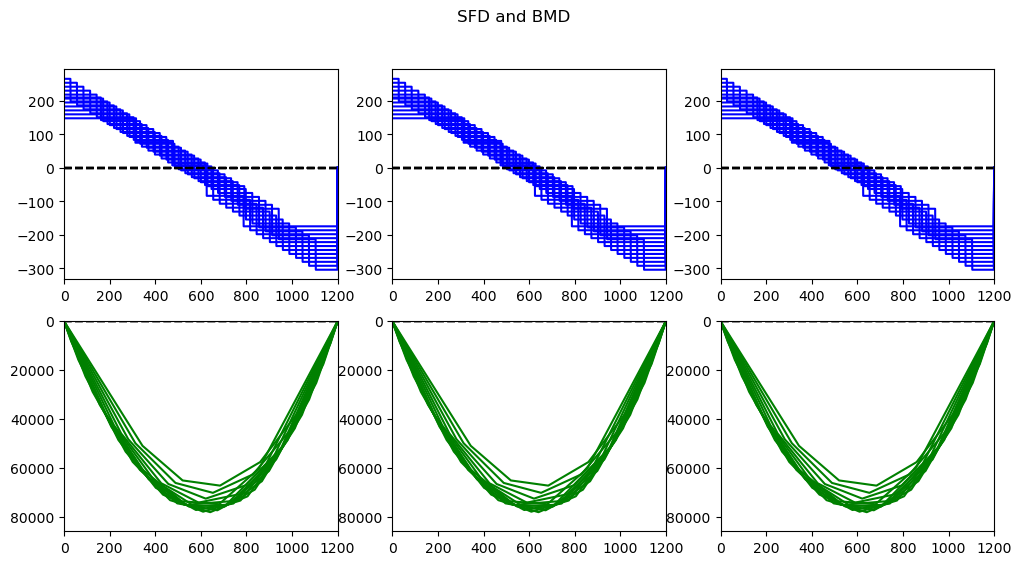

In [12]:
fig
